# Importing Necessary Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## To Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [6]:
# Describe all numerical columns
df.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


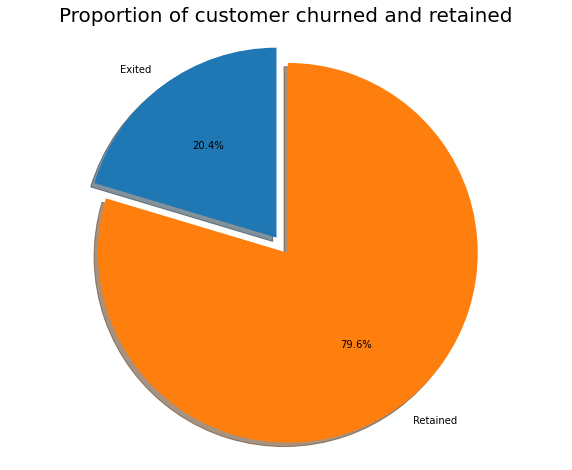

In [8]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [9]:
# Describe all non-numerical/categorical columns
df.describe(include = ['O']) 

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [10]:
# Checking number of unique customers in the dataset
df.shape[0], df.CustomerId.nunique()

(10000, 10000)

In [11]:
df.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [12]:
# Categories of Column
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [13]:
# Identifying target variable and removing the non-essential columns
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
## Keeping aside a test/holdout set
df_train_val, df_test, y_train_val, y_test = train_test_split(df, y.ravel(), test_size = 0.1, random_state = 42)

## Splitting into train and validation set
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size = 0.12, random_state = 42)

In [16]:
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape

((7920, 12), (1080, 12), (1000, 12), (7920,), (1080,), (1000,))

In [17]:
np.mean(y_train), np.mean(y_val), np.mean(y_test)

(0.20303030303030303, 0.22037037037037038, 0.191)

# Univariate Plot

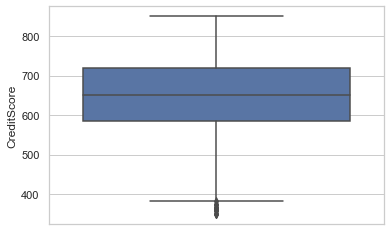

In [18]:
# CreditScore
sns.set(style="whitegrid")
sns.boxplot(y = df_train['CreditScore'])

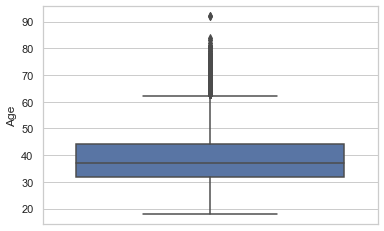

In [19]:
# Age
sns.boxplot(y = df_train['Age'])

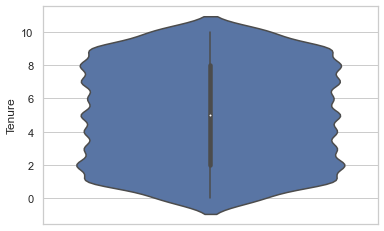

In [20]:
# Tenure
sns.violinplot(y = df_train.Tenure)

Tenure is uniformly spread

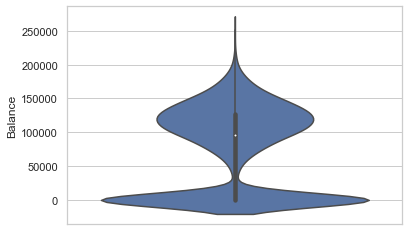

In [21]:
# Balance
sns.violinplot(y = df_train['Balance'])

Balance has multimodal distribution

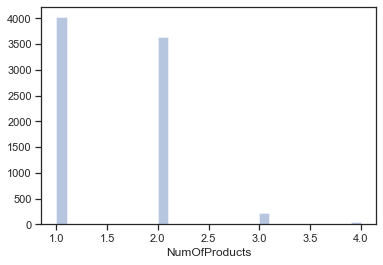

In [22]:
# NumOfProducts
sns.set(style = 'ticks')
sns.distplot(df_train.NumOfProducts, hist=True, kde=False)

There are predominantly only two values (1 and 2). Hence, its chances of being a strong predictor is also very unlikely

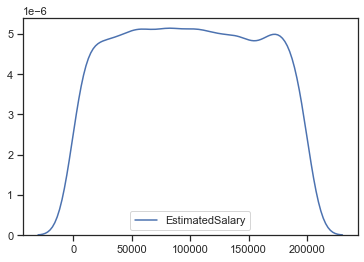

In [23]:
# EstimatedSalary
sns.kdeplot(df_train.EstimatedSalary)

Salary is also uniformly distributed

# Bivariate Analysis

In [24]:
# Check linear correlation (rho) between individual features and the target variable
corr = df_train.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.002099,0.005994,-0.001507,0.014110,-0.011868,0.035057,0.000358,-0.028117
Age,0.002099,1.000000,-0.011384,0.027721,-0.033305,-0.019633,0.093573,-0.006827,0.288221
Tenure,0.005994,-0.011384,1.000000,-0.013081,0.018231,0.026148,-0.021263,0.010145,-0.010660
Balance,-0.001507,0.027721,-0.013081,1.000000,-0.304318,-0.021464,-0.008085,0.027247,0.113377
NumOfProducts,0.014110,-0.033305,0.018231,-0.304318,1.000000,0.007202,0.014809,0.009769,-0.039200
HasCrCard,-0.011868,-0.019633,0.026148,-0.021464,0.007202,1.000000,-0.006526,-0.008413,-0.013659
IsActiveMember,0.035057,0.093573,-0.021263,-0.008085,0.014809,-0.006526,1.000000,-0.016446,-0.152477
EstimatedSalary,0.000358,-0.006827,0.010145,0.027247,0.009769,-0.008413,-0.016446,1.000000,0.015881
Exited,-0.028117,0.288221,-0.010660,0.113377,-0.039200,-0.013659,-0.152477,0.015881,1.000000


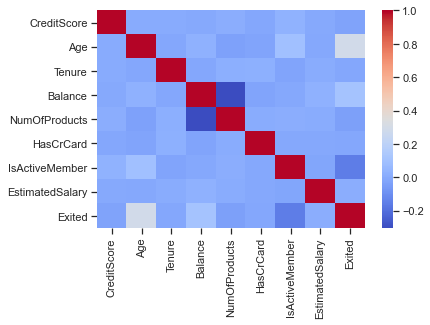

In [25]:
sns.heatmap(corr, cmap = 'coolwarm')

Individual features versus their distibution across target variable values

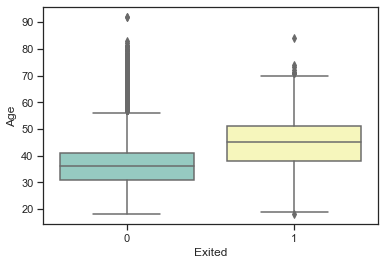

In [26]:
sns.boxplot(x = "Exited", y = "Age", data = df_train, palette="Set3")

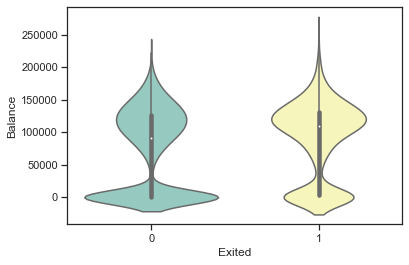

In [27]:
sns.violinplot(x = "Exited", y = "Balance", data = df_train, palette="Set3")

In [28]:
# Check association of categorical features with target variable
cat_vars_bv = ['Gender', 'IsActiveMember']

for col in cat_vars_bv:
    print(df_train.groupby([col]).Exited.mean())

Gender
Female    0.248191
Male      0.165511
Name: Exited, dtype: float64
IsActiveMember
0    0.266285
1    0.143557
Name: Exited, dtype: float64


In [29]:
col = 'NumOfProducts'
df_train.groupby([col]).Exited.mean()
df_train[col].value_counts()

1    4023
2    3629
3     223
4      45
Name: NumOfProducts, dtype: int64

# Missing Values

In [30]:
df_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values present in this dataset.

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
# Label encoding of Gender variable
df_train['Gender'] = le.fit_transform(df_train['Gender'])

<ipython-input-33-14e80a0744f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'] = le.fit_transform(df_train['Gender'])


In [34]:
## Encoding Gender feature for validation and test set
df_val['Gender'] = le.fit_transform(df_val['Gender'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

<ipython-input-34-3b2878c163bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Gender'] = le.fit_transform(df_val['Gender'])
<ipython-input-34-3b2878c163bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Gender'] = le.fit_transform(df_test['Gender'])


In [35]:
df_test.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,Anderson,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0
4684,Herring,623,France,1,43,1,0.00,2,1,1,146379.30,0
1731,Amechi,601,Spain,0,44,4,0.00,2,1,0,58561.31,0
4742,Liang,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0
4521,Chuang,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0


In [36]:
df_test.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
df_val.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
df_train.Gender.unique(), df_val.Gender.unique(), df_test.Gender.unique()

(array([1, 0]), array([1, 0]), array([1, 0]))

## One Hot Encoding the categorical values

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

In [41]:
enc_train = le_ohe.fit_transform(df_train.Geography).reshape(df_train.shape[0],1)
np.unique(enc_train)

array([0, 1, 2])

In [42]:
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [43]:
enc_val = le_ohe.fit_transform(df_val.Geography).reshape(df_val.shape[0],1)
enc_test = le_ohe.fit_transform(df_test.Geography).reshape(df_test.shape[0],1)

In [44]:
np.unique(enc_val)

array([0, 1, 2])

In [45]:
np.unique(enc_test)

array([0, 1, 2])

In [46]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

In [47]:
cols=['country_France', 'country_Germany', 'country_Spain']

In [48]:
## Adding to the respective dataframes
df_train = pd.concat([df_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
df_val = pd.concat([df_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
df_test = pd.concat([df_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)

In [49]:
print("Training set")
print(df_train.head())
print("\n\nValidation set")
print(df_val.head())
print("\n\nTest set")
print(df_test.head())

Training set
         Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Yermakova          678   Germany       1   36       1  117864.85   
1  Warlow-Davies          613    France       0   27       5  125167.74   
2             Fu          628    France       1   45       9       0.00   
3           Shih          513    France       1   30       5       0.00   
4        Mahmood          639    France       1   22       4       0.00   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              2          1               0         27619.06       0   
1              1          1               0        199104.52       0   
2              2          1               1         96862.56       0   
3              2          1               0        162523.66       0   
4              2          1               0         28188.96       0   

   country_France  country_Germany  country_Spain  
0             0.0              1.0            0.0  

In [50]:
# Droping the Geography column
df_train.drop(['Geography'], axis = 1, inplace=True)
df_val.drop(['Geography'], axis = 1, inplace=True)
df_test.drop(['Geography'], axis = 1, inplace=True)

# Feature Scaling and Normalization

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
df_train.columns

Index(['Surname', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

In [53]:
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']

In [54]:
sc_X_train = sc.fit_transform(df_train[cont_vars])

In [55]:
# Converting from array to dataframe and naming the respective features/columns
sc_X_train = pd.DataFrame(data = sc_X_train, columns = cont_vars)
print("Shape:",sc_X_train.shape)
print(sc_X_train.head())

Shape: (7920, 6)
   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary
0     0.284761 -0.274383 -1.389130  0.670778       0.804059        -1.254732
1    -0.389351 -1.128482 -0.004763  0.787860      -0.912423         1.731950
2    -0.233786  0.579716  1.379604 -1.218873       0.804059        -0.048751
3    -1.426446 -0.843782 -0.004763 -1.218873       0.804059         1.094838
4    -0.119706 -1.602981 -0.350855 -1.218873       0.804059        -1.244806


In [56]:
# Mapping learnt on the continuous features
sc_map = {'mean':sc.mean_, 'std':np.sqrt(sc.var_)}

In [57]:
# Scaling validation and test sets by transforming the mapping obtained through the training set
sc_X_val = sc.transform(df_val[cont_vars])
sc_X_test = sc.transform(df_test[cont_vars])

In [58]:
# Converting val and test arrays to dataframes for re-usability
sc_X_val = pd.DataFrame(data = sc_X_val, columns = cont_vars)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = cont_vars)

# Feature Selection

In [59]:
## Creating feature-set and target for RFE model
y = df_train['Exited'].values
X = pd.concat([df_train[cat_vars], sc_X_train[cont_vars]], ignore_index=True, axis = 1)
X.columns = cat_vars + cont_vars

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [61]:
est = LogisticRegression()
#est = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
num_features_to_select = 10

In [62]:
rfe = RFE(est, num_features_to_select)
rfe = rfe.fit(X.values, y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\satis\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True  True  True  True  True  True  True  True False  True  True False]
[1 1 1 1 1 1 1 1 2 1 1 3]


In [63]:
# Logistic Regression (Linear model)
mask = rfe.support_.tolist()
selected_feats = [b for a,b in zip(mask, X.columns) if a]
selected_feats

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'CreditScore',
 'Age',
 'Balance',
 'NumOfProducts']

In [64]:
# Decision Tree (Non-linear model)
mask = rfe.support_.tolist()
selected_feats_dt = [b for a,b in zip(mask, X.columns) if a]
selected_feats_dt

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'CreditScore',
 'Age',
 'Balance',
 'NumOfProducts']

# Training Model

# Logistic Regression

We'll train the linear models on the features selected through RFE

In [65]:
# Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [66]:
selected_cat_vars = [x for x in selected_feats if x in cat_vars]
selected_cont_vars = [x for x in selected_feats if x in cont_vars]

In [67]:
# Using categorical features and scaled numerical features
X_train = np.concatenate((df_train[selected_cat_vars].values, sc_X_train[selected_cont_vars].values), axis = 1)
X_val = np.concatenate((df_val[selected_cat_vars].values, sc_X_val[selected_cont_vars].values), axis = 1)
X_test = np.concatenate((df_test[selected_cat_vars].values, sc_X_test[selected_cont_vars].values), axis = 1)

X_train.shape, X_val.shape, X_test.shape

((7920, 10), (1080, 10), (1000, 10))

# Class Imbalance

In [68]:
_, num_samples = np.unique(y_train, return_counts = True)
num_samples

array([6312, 1608], dtype=int64)

In [69]:
# Obtaining class weights based on the class samples imbalance ratio
weights = np.max(num_samples)/num_samples
weights

array([1.        , 3.92537313])

In [70]:
weights_dict = dict()
class_labels = [0,1]
for a,b in zip(class_labels,weights):
    weights_dict[a] = b

weights_dict

{0: 1.0, 1: 3.925373134328358}

In [71]:
# Defining model
lr = LogisticRegression(C = 1.0, penalty = 'l2', class_weight = weights_dict, n_jobs = -1)

In [72]:
# Fitting model
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 3.925373134328358}, n_jobs=-1)

In [73]:
# Fitted model parameters
print(selected_cat_vars + selected_cont_vars)
print()
print(lr.coef_)
print()
print(lr.intercept_)

['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain', 'CreditScore', 'Age', 'Balance', 'NumOfProducts']

[[-0.5262875  -0.06425392 -0.90697098 -0.29200285  0.49286866 -0.2003555
  -0.07024846  0.8329427   0.16272296 -0.02873682]]

[0.58458959]


## Training metrics

In [74]:
print("Training Metrics")
print("ROC AUC SCORE: ",roc_auc_score(y_train, lr.predict(X_train)))
print()
print("Recall Score: ",recall_score(y_train, lr.predict(X_train)))
print()
print("Confusion Matrix")
print(confusion_matrix(y_train, lr.predict(X_train)))
print()
print("Claasification Report")
print(classification_report(y_train, lr.predict(X_train)))

Training Metrics
ROC AUC SCORE:  0.7074040444166997

Recall Score:  0.6977611940298507

Confusion Matrix
[[4526 1786]
 [ 486 1122]]

Claasification Report
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6312
           1       0.39      0.70      0.50      1608

    accuracy                           0.71      7920
   macro avg       0.64      0.71      0.65      7920
weighted avg       0.80      0.71      0.74      7920



## Validation metrics

In [75]:
print("Validation Metrics")
print("ROC AUC Score: ",roc_auc_score(y_val, lr.predict(X_val)))
print()
print("Recall Score: ",recall_score(y_val, lr.predict(X_val)))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_val, lr.predict(X_val)))
print()
print("Classification Report:")
print(classification_report(y_val, lr.predict(X_val)))

Validation Metrics
ROC AUC Score:  0.6910117966426476

Recall Score:  0.6848739495798319

Confusion Matrix:
[[587 255]
 [ 75 163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       842
           1       0.39      0.68      0.50       238

    accuracy                           0.69      1080
   macro avg       0.64      0.69      0.64      1080
weighted avg       0.78      0.69      0.72      1080



In [76]:
lt=classification_report(y_val, lr.predict(X_val),output_dict=True)

# SVM Model

In [77]:
from sklearn.svm import SVC

## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [78]:
## Using categorical features and scaled numerical features
X_train = np.concatenate((df_train[selected_cat_vars].values, sc_X_train[selected_cont_vars].values), axis = 1)
X_val = np.concatenate((df_val[selected_cat_vars].values, sc_X_val[selected_cont_vars].values), axis = 1)
X_test = np.concatenate((df_test[selected_cat_vars].values, sc_X_test[selected_cont_vars].values), axis = 1)

X_train.shape, X_val.shape, X_test.shape

((7920, 10), (1080, 10), (1000, 10))

In [79]:
weights_dict = {0: 1.0, 1: 3.92}
weights_dict

{0: 1.0, 1: 3.92}

In [80]:
svm = SVC(C = 1.0, kernel = "linear", class_weight = weights_dict)

In [81]:
svm.fit(X_train, y_train)

SVC(class_weight={0: 1.0, 1: 3.92}, kernel='linear')

In [82]:
## Fitted model parameters
print(selected_cat_vars + selected_cont_vars)
print()
print(svm.coef_)
print()
print(svm.intercept_)

['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain', 'CreditScore', 'Age', 'Balance', 'NumOfProducts']

[[-0.4644146  -0.02548508 -0.73164126 -0.25454065  0.47260494 -0.21806429
  -0.06762602  0.90615117  0.14705381 -0.01839413]]

[0.42777612]


## Training metrics

In [83]:
print("Training Metrics")
print("ROC AUC Score: ", roc_auc_score(y_train, svm.predict(X_train)))
print()
print("Recall Score: ", recall_score(y_train, svm.predict(X_train)))
print()
print("Confusion Matrix")
print(confusion_matrix(y_train, svm.predict(X_train)))
print()
print("Classification Report")
print(classification_report(y_train, svm.predict(X_train)))

Training Metrics
ROC AUC Score:  0.7161672625465827

Recall Score:  0.7008706467661692

Confusion Matrix
[[4617 1695]
 [ 481 1127]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      6312
           1       0.40      0.70      0.51      1608

    accuracy                           0.73      7920
   macro avg       0.65      0.72      0.66      7920
weighted avg       0.80      0.73      0.75      7920



In [84]:
## Validation metrics
print("Validation Metrics")
print("ROC AUC Score: ",roc_auc_score(y_val, svm.predict(X_val)))
print()
print("Recall Score: ",recall_score(y_val, svm.predict(X_val)))
print()
print("Confusion Matrix")
print(confusion_matrix(y_val, svm.predict(X_val)))
print()
print("Classification Report")
print(classification_report(y_val, svm.predict(X_val)))

Validation Metrics
ROC AUC Score:  0.6849837322102237

Recall Score:  0.6680672268907563

Confusion Matrix
[[591 251]
 [ 79 159]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       842
           1       0.39      0.67      0.49       238

    accuracy                           0.69      1080
   macro avg       0.63      0.68      0.64      1080
weighted avg       0.77      0.69      0.72      1080



In [85]:
sv=classification_report(y_val, svm.predict(X_val),output_dict=True)

## Decision Tree Model

In [86]:
from sklearn.tree import DecisionTreeClassifier

## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [87]:
weights_dict = {0: 1.0, 1: 3.92}
weights_dict

{0: 1.0, 1: 3.92}

In [88]:
# Features selected from the RFE process
selected_feats_dt

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'CreditScore',
 'Age',
 'Balance',
 'NumOfProducts']

In [89]:
# Re-defining X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected
X_train = df_train[selected_feats_dt].values
X_val = df_val[selected_feats_dt].values
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(7920, 10) (7920,)
(1080, 10) (1080,)


In [90]:
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

In [91]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=4, min_samples_leaf=15, min_samples_split=25)

In [92]:
## Checking the importance of different features of the model
pd.DataFrame({'features': selected_feats,
              'importance': clf.feature_importances_
             }).sort_values(by = 'importance', ascending=False)

,features,importance
7,Age,0.477546
9,NumOfProducts,0.352345
2,IsActiveMember,0.096566
8,Balance,0.040955
4,country_Germany,0.030544
6,CreditScore,0.002045
0,Gender,0.000000
1,HasCrCard,0.000000
3,country_France,0.000000
5,country_Spain,0.000000


## Training metrics

In [93]:
print("Training Metrics")
print("ROC AUC Score: ",roc_auc_score(y_train, clf.predict(X_train)))
print()
print("Recall Score: ",recall_score(y_train, clf.predict(X_train)))
print()
print("Confusion Matrix")
print(confusion_matrix(y_train, clf.predict(X_train)))
print()
print("Classification Report")
print(classification_report(y_train, clf.predict(X_train)))

Training Metrics
ROC AUC Score:  0.7514707829672929

Recall Score:  0.7369402985074627

Confusion Matrix
[[4835 1477]
 [ 423 1185]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6312
           1       0.45      0.74      0.56      1608

    accuracy                           0.76      7920
   macro avg       0.68      0.75      0.70      7920
weighted avg       0.82      0.76      0.78      7920



## Validation metrics

In [94]:
print("Validation Metrics")
print("ROC AUC Score: ",roc_auc_score(y_val, clf.predict(X_val)))
print()
print("Recall Score:",recall_score(y_val, clf.predict(X_val)))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_val, clf.predict(X_val)))
print()
print("Classification Report:")
print(classification_report(y_val, clf.predict(X_val)))

Validation Metrics
ROC AUC Score:  0.7477394758378411

Recall Score: 0.7436974789915967

Confusion Matrix:
[[633 209]
 [ 61 177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       842
           1       0.46      0.74      0.57       238

    accuracy                           0.75      1080
   macro avg       0.69      0.75      0.70      1080
weighted avg       0.81      0.75      0.77      1080



In [95]:
dt=classification_report(y_val, clf.predict(X_val),output_dict=True)

In [96]:
models=dict()
models={"Logistic Regression":{"ROC":roc_auc_score(y_val, lr.predict(X_val)),
                              "Recall":recall_score(y_val, lr.predict(X_val)),
                              "Accuracy":lt["accuracy"]},
       "SVM":{"ROC":roc_auc_score(y_val, svm.predict(X_val)),
             "Recall":recall_score(y_val, svm.predict(X_val)),
             "Accuracy":sv["accuracy"]},
       "Decision Tree":{"ROC":roc_auc_score(y_val, clf.predict(X_val)),
                       "Recall":recall_score(y_val, clf.predict(X_val)),
                       "Accuracy":dt["accuracy"]}}

In [97]:
models_df=pd.DataFrame(models)
models_df=models_df.T
models_df

,ROC,Recall,Accuracy
Logistic Regression,0.593704,0.810924,0.694444
SVM,0.589089,0.836134,0.694444
Decision Tree,0.747739,0.743697,0.750000
